In [1]:
import pandas as pd
from sklearn.model_selection import train_test_split
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sb
import utils_nans1 as un
from sklearn.linear_model import HuberRegressor


# Suppress warnings
import warnings 
warnings.filterwarnings('ignore')

# Display settings
pd.set_option('display.max_columns', None)
from IPython.display import display
from scipy import stats


In [2]:
df_x=pd.read_csv('parsed_data/podaci_za_predvidjanje.csv')
df_y=pd.read_csv('parsed_data/predvidjanja.csv')

df_x.sort_values(by=['game_id'], inplace=True)
df_y.sort_values(by=['game_id'], inplace=True)

df_x.drop(['game_id'], axis=1, inplace=True)
df_x.drop(['team_id'], axis=1, inplace=True)
df_x.drop(['opponent'], axis=1, inplace=True)
#df_x.drop(['opponent_previous_game'], axis=1, inplace=True)
df_x.drop(['points_scored'], axis=1, inplace=True)
df_y.drop(['game_id'], axis=1, inplace=True)

display(df_x.head(), df_y.head())

,fast_break_points_for,fast_break_points_against,turnover_points_for,turnover_points_against,second_chance_points_for,second_chance_points_against,defensive_rebounds_for,defensive_rebounds_against,offensive_rebounds_for,offensive_rebounds_against,turnovers_for,turnovers_against,steals_for,steals_against,assists_for,assists_against,3P%_for,3P%_against,2P%_for,2P%_against,FT%_for,PFR_for,PFD_against,3PR_for,3PR_against,FTR_for,FTR_against,PACE,ORtg,DRtg,eFG%,TS%
0,1,0,10,13,12,20,19,20,7,17,9,7,2,4,21,14,37.745569,37.745569,51.864171,51.864171,75.662177,29.706255,29.436574,36.961091,36.961091,32.024197,32.024197,71.726654,110.499731,110.499731,53.592021,57.545070
1,0,1,13,10,20,12,20,19,17,7,7,9,4,2,14,21,37.745569,37.745569,51.864171,51.864171,75.662177,29.706255,29.436574,36.961091,36.961091,32.024197,32.024197,71.726654,110.499731,110.499731,53.592021,57.545070
2,2,4,30,16,7,14,19,29,7,13,14,19,11,8,16,18,34.285714,47.368421,56.666667,51.219512,76.923077,26.455026,23.809524,53.846154,31.666667,20.000000,28.333333,75.600000,105.820106,107.142857,53.846154,56.561086
3,4,2,16,30,14,7,29,19,13,7,19,14,8,11,18,16,47.368421,34.285714,51.219512,56.666667,70.588235,25.132275,26.455026,31.666667,53.846154,28.333333,20.000000,75.600000,107.142857,105.820106,57.500000,60.017783
4,7,11,13,14,9,15,25,24,10,13,12,9,5,8,17,20,37.745569,37.745569,51.864171,51.864171,75.662177,29.706255,29.436574,36.961091,36.961091,32.024197,32.024197,71.726654,110.499731,110.499731,53.592021,57.545070


,score
0,89
1,86
2,80
3,81
4,82


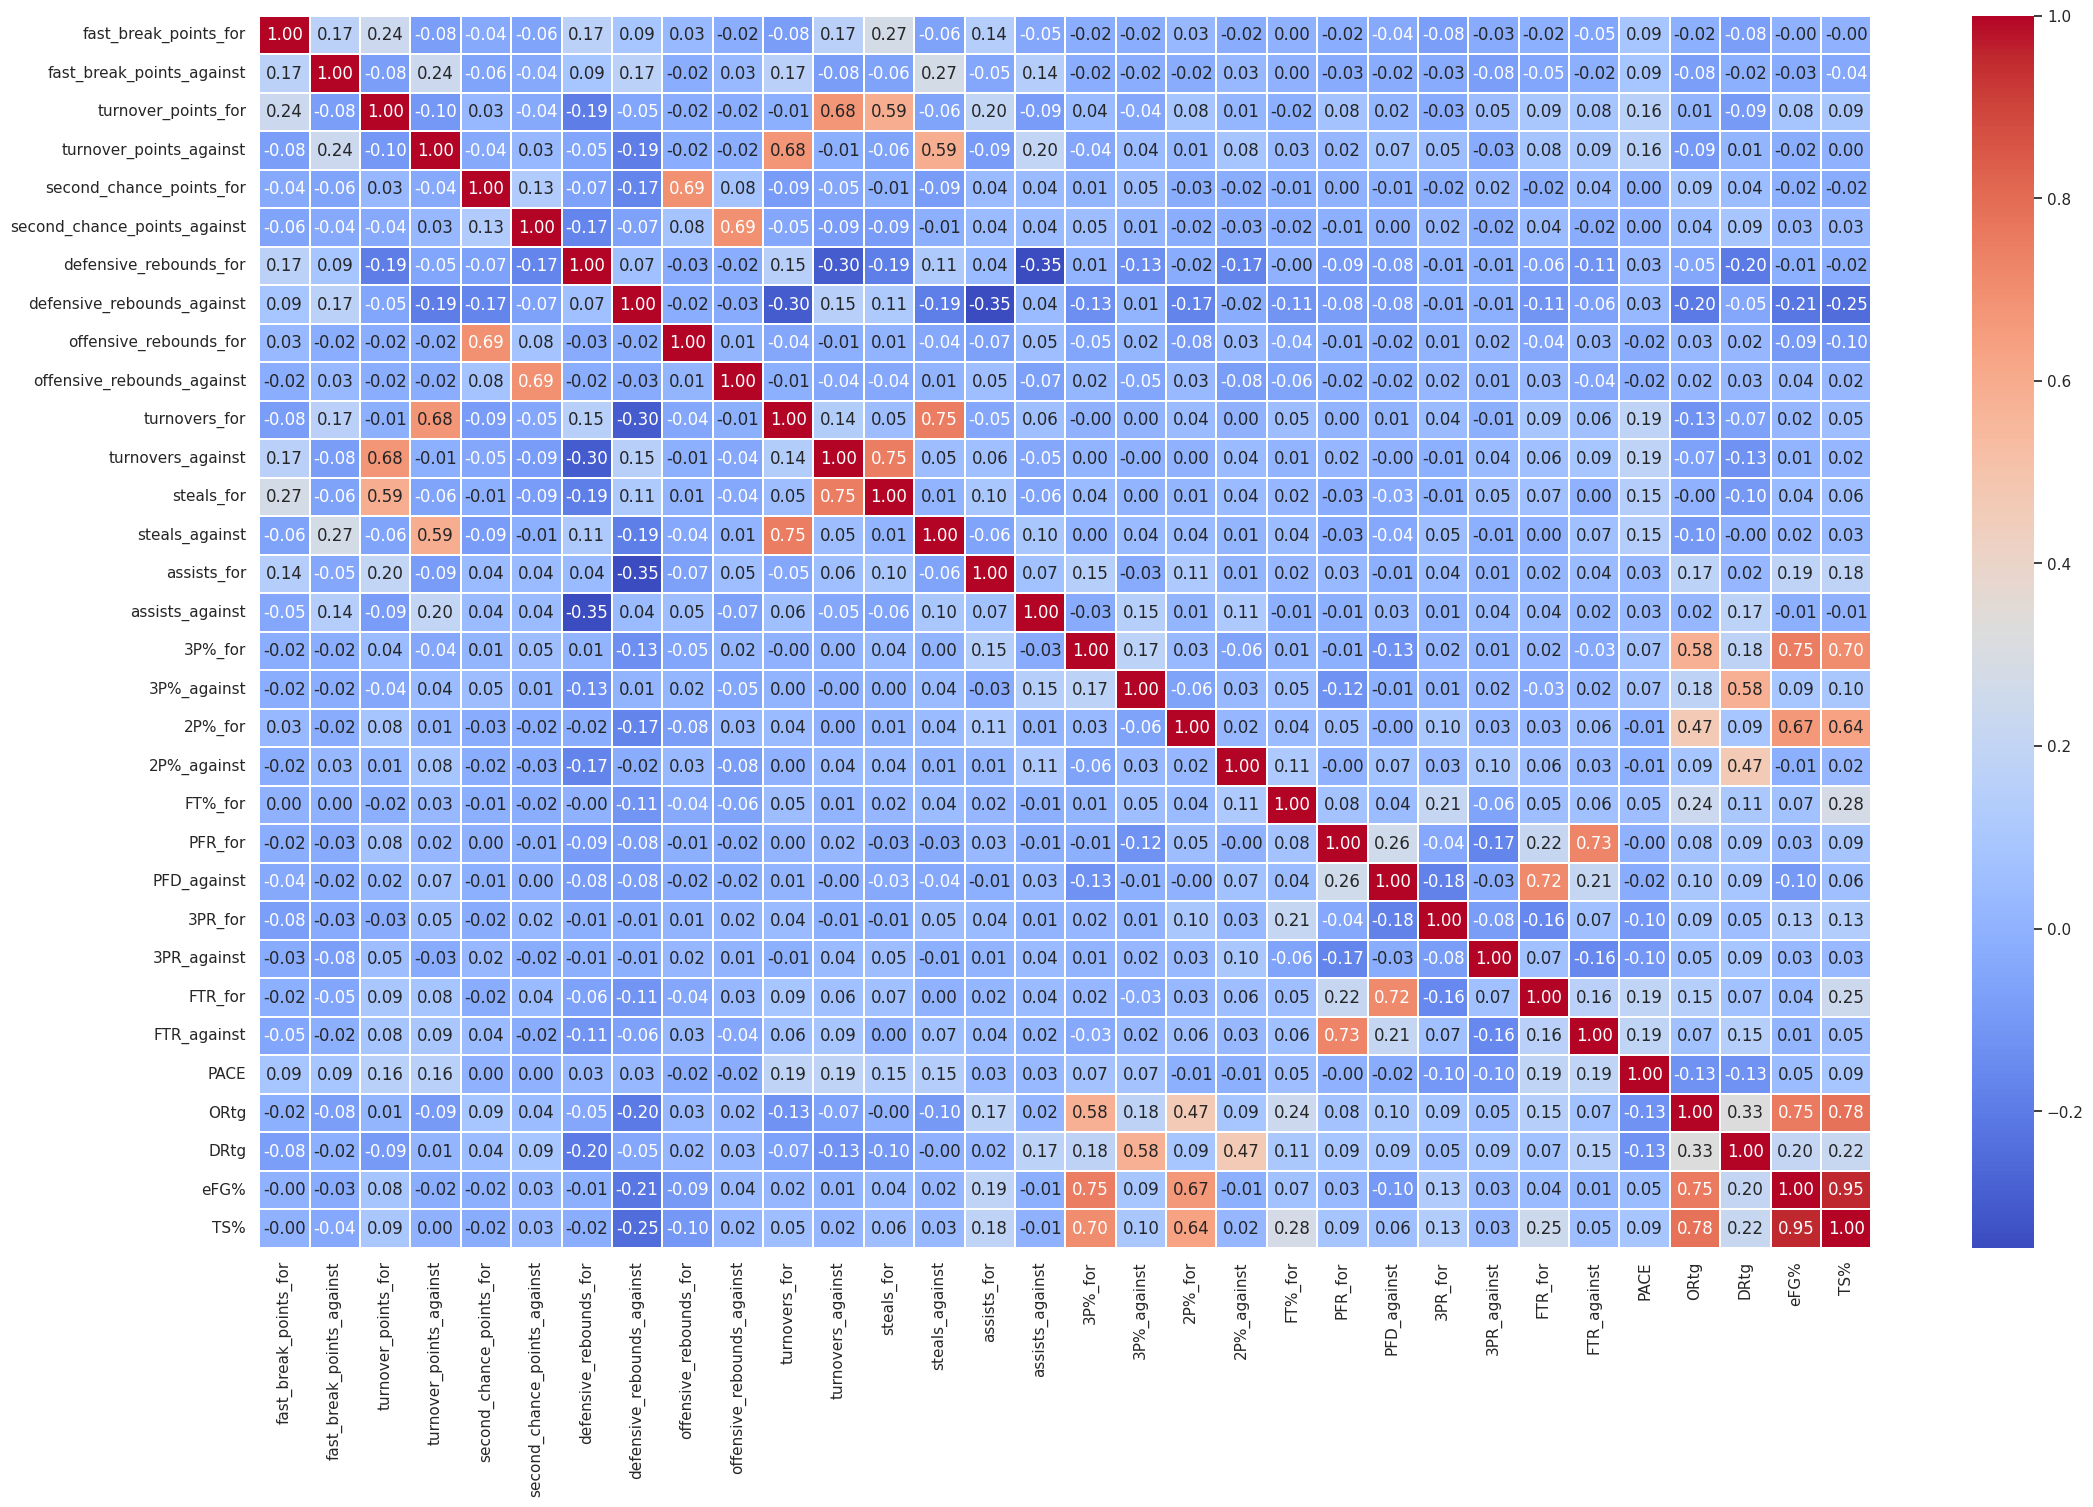

In [3]:
x_with_const=sm.add_constant(df_x)
model=sm.OLS(df_y, x_with_const).fit()

plt.figure(figsize=(26,16))

correration_matrix=df_x.corr()
sb.heatmap(correration_matrix, annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.1)
plt.show()


### Analiza koreleacija izmedju parametara
Postoji znacjna koreleacija izmedju:
* offensive_rebounds_for i second_chance_points_for
* offensive_rebounds_against i second_chance_points_against
* turnovers_for i turnover_points_against
* turnovers_against i turnover_points_for
* steals_for i turnover_points_for
* steals_against i turnover_points_against
* steals_for i turnovers_against
* steals_against i turnovers_for

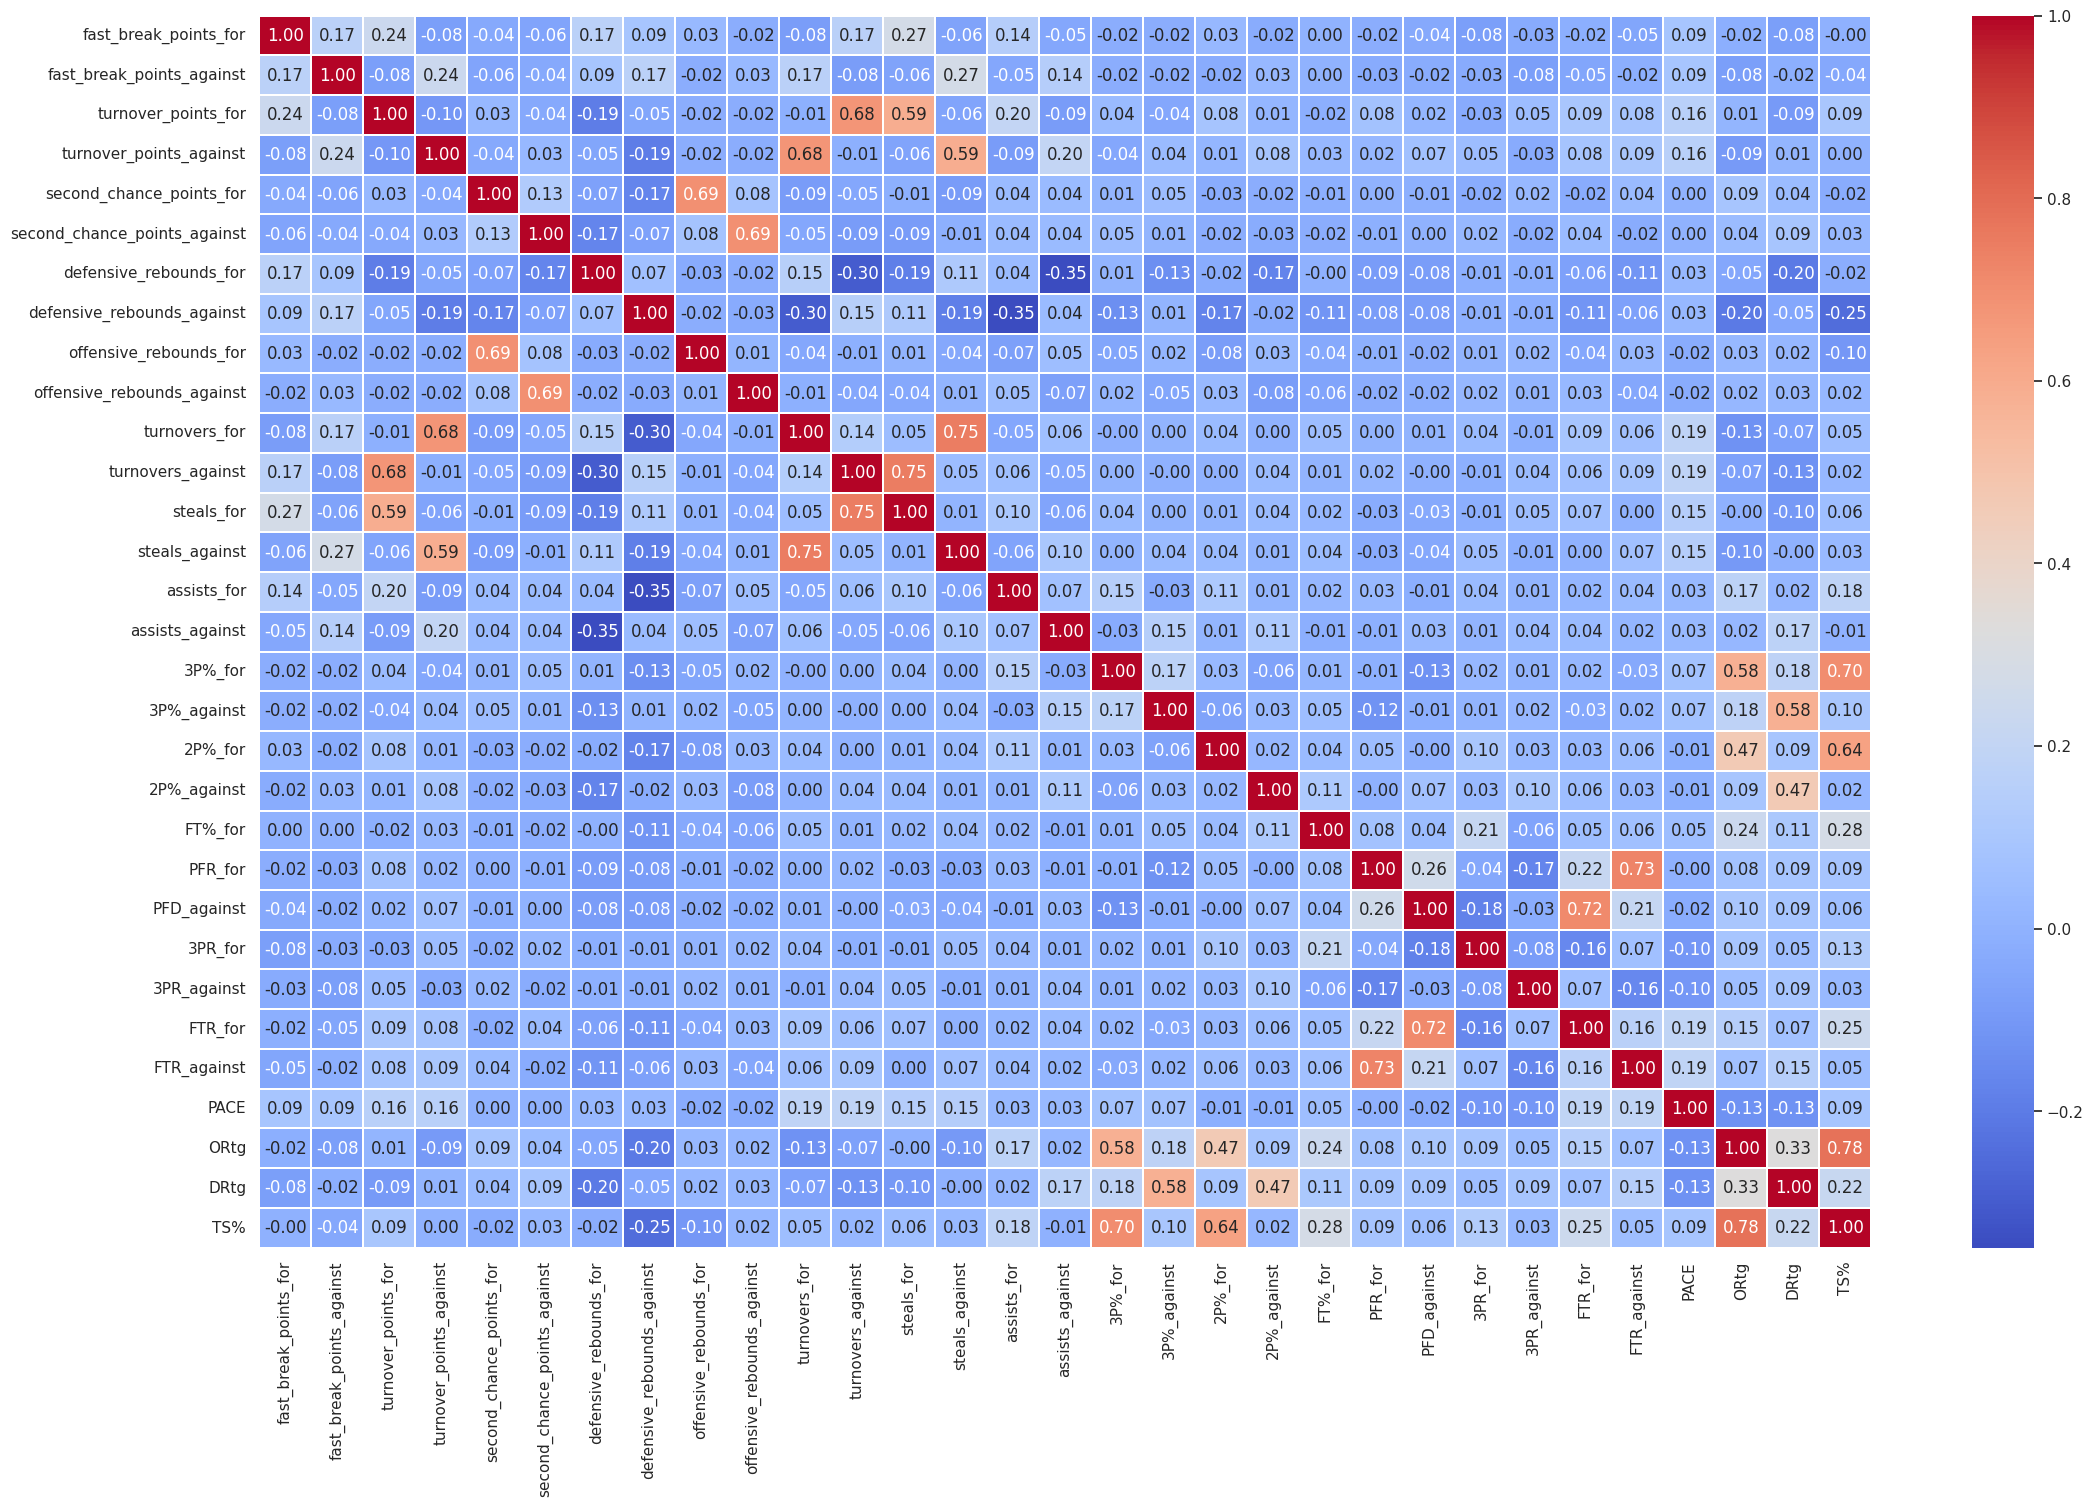

In [4]:
#df_x.drop(['second_chance_points_for'], axis=1, inplace=True)
#df_x.drop(['second_chance_points_against'], axis=1, inplace=True)
#df_x.drop(['turnover_points_against'], axis=1, inplace=True)
#df_x.drop(['turnover_points_for'], axis=1, inplace=True)

#df_x.drop(['turnovers_against'], axis=1, inplace=True)
#df_x.drop(['turnovers_for'], axis=1, inplace=True)

#df_x.drop(['PFD_against'], axis=1, inplace=True)
#df_x.drop(['PFR_for'], axis=1, inplace=True)
df_x.drop(['eFG%'], axis=1, inplace=True)
#df_x.drop(['TS%'], axis=1, inplace=True)
#df_x.drop(['ORtg'], axis=1, inplace=True)
#df_x.drop(['DRtg'], axis=1, inplace=True)
#df_x.drop(['assists_for'], axis=1, inplace=True)


x_with_const=sm.add_constant(df_x)
model=sm.OLS(df_y, x_with_const).fit()

plt.figure(figsize=(26,16))

correration_matrix=df_x.corr()
sb.heatmap(correration_matrix, annot=True,cmap='coolwarm',fmt='.2f',linewidths=0.1)
plt.show()

### Izbaceni parametri sa visokom korelacijom

In [5]:
def box_plot(df, column):
    df.boxplot(column=column)
    plt.grid(False)
    plt.show()

def outliers(df, column):
    Q1 = df[column].quantile(0.10)
    Q3 = df[column].quantile(0.90)
    IQR = Q3 - Q1
    return df[(df[column] < Q1 - 1.5 * IQR) | (df[column] > Q3 + 1.5 * IQR)]

In [6]:
df_x['y']=df_y
df_x.head()

index_list=[]
for column in df_x.columns:
    if column!='y':
        index_list.extend(outliers(df_x, column).index.tolist())
index_set=set(index_list)

for i in index_set:
    df_x.drop(i, inplace=True)
    df_y.drop(i, inplace=True)

df_x=df_x.drop(['y'], axis=1)


In [7]:
df_x_train, df_x_test, df_y_train, df_y_test=train_test_split(df_x, df_y, test_size=0.2, random_state=42)
un.are_assumptions_satisfied(model, df_x_train, df_y_train.values.ravel(), p_value_thresh=0.05)

Autocorrelation assumption is not satisfied.
Normality assumption is not satisfied.


False

## T-test

In [8]:
# pomocna funkcija koja vraca fitovan model``
def get_fitted_model(x, y):
    x_with_const = sm.add_constant(x)
    model = sm.OLS(y, x_with_const).fit()
    return model


noncolinearl_model=get_fitted_model(df_x_train, df_y_train)
print(noncolinearl_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.584
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     29.54
Date:                Sun, 04 Feb 2024   Prob (F-statistic):          2.59e-103
Time:                        19:10:04   Log-Likelihood:                -2283.3
No. Observations:                 685   AIC:                             4631.
Df Residuals:                     653   BIC:                             4775.
Df Model:                          31                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

### Analiza t-testa
Parametri ciji je p-value veci od 0.05 su:


In [26]:
df_x_ttested=df_x_train.copy()

#0.564

df_x_ttested.drop(['PFD_against'], axis=1, inplace=True)
df_x_ttested.drop(['2P%_against'], axis=1, inplace=True)
df_x_ttested.drop(['3P%_against'], axis=1, inplace=True)
df_x_ttested.drop(['offensive_rebounds_against'], axis=1, inplace=True)
df_x_ttested.drop(['FTR_for'], axis=1, inplace=True)
df_x_ttested.drop(['3P%_for'], axis=1, inplace=True)        
df_x_ttested.drop(['2P%_for'], axis=1, inplace=True)    
df_x_ttested.drop(['FTR_against'], axis=1, inplace=True)                 
#df_x_ttested.drop(['DRtg'], axis=1, inplace=True)   
df_x_ttested.drop(['steals_for'], axis=1, inplace=True)
df_x_ttested.drop(['fast_break_points_for'], axis=1, inplace=True)
#df_x_ttested.drop(['turnover_points_for'], axis=1, inplace=True)  
df_x_ttested.drop(['fast_break_points_against'], axis=1, inplace=True)     
df_x_ttested.drop(['TS%'], axis=1, inplace=True)     
df_x_ttested.drop(['second_chance_points_against'], axis=1, inplace=True)
#df_x_ttested.drop(['defensive_rebounds_for'], axis=1, inplace=True)
#df_x_ttested.drop(['turnover_points_against'], axis=1, inplace=True)
#df_x_ttested.drop(['offensive_rebounds_for'], axis=1, inplace=True)    
#df_x_ttested.drop(['turnovers_for'], axis=1, inplace=True)
#df_x_ttested.drop(['defensive_rebounds_against'], axis=1, inplace=True)
df_x_ttested.drop(['3PR_against'], axis=1, inplace=True)
#df_x_ttested.drop(['FT%_for'], axis=1, inplace=True)
df_x_ttested.drop(['steals_against'], axis=1, inplace=True)
#df_x_ttested.drop(['assists_for'], axis=1, inplace=True)
#df_x_ttested.drop(['PFR_for'], axis=1, inplace=True)
#df_x_ttested.drop(['3PR_for'], axis=1, inplace=True)
#df_x_ttested.drop(['assists_against'], axis=1, inplace=True)
#df_x_ttested.drop(['second_chance_points_for'], axis=1, inplace=True)
#df_x_ttested.drop(['turnovers_against'], axis=1, inplace=True)


noncolinearl_model=get_fitted_model(df_x_ttested, df_y_train)
print(noncolinearl_model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.574
Model:                            OLS   Adj. R-squared:                  0.564
Method:                 Least Squares   F-statistic:                     56.26
Date:                Sun, 04 Feb 2024   Prob (F-statistic):          3.46e-112
Time:                        19:15:02   Log-Likelihood:                -2291.2
No. Observations:                 685   AIC:                             4616.
Df Residuals:                     668   BIC:                             4693.
Df Model:                          16                                         
Covariance Type:            nonrobust                                         
                                 coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------------------
const               

In [10]:
noncolinearl_model.f_pvalue

2.5862934672921816e-11

Vrednost f-testa je manja od 0.05, tako da postoji linearna veza $Y$ sa bar jednom od $X$ varijabli.
Takodje  Durbin-Watson statistika je izmedju 1.5 i 2, sto znaci da nema autokorelacije.

7.852366526090207
